### Kütüphane

In [1]:
import pandas as pd

### Veri setinin okunması

In [2]:
data = pd.read_csv("data/clean_data.csv")

In [3]:
data1 = data[data["Year"] == 2014]

In [4]:
data1.sample(3)
len(data1)

146320

### Veri setinden konum ve posta kodu sütünlarının ayrılması

In [5]:
data_geo = data1[["Longitude","Latitude","Local_Authority_(Highway)"]]

### Geo Veri Kütüphaneleri

In [6]:
import geopandas
from geodatasets import get_path

### Posta koduna göre işlem yapabilmek için veri setini yükleme

In [7]:
gdf_uk = geopandas.read_file("data/uk_lad.geojson")

In [8]:
gdf_uk.sample(5)

,dataset,end-date,entity,entry-date,name,organisation-entity,prefix,reference,start-date,typology,geometry
130,local-authority-district,,8600130,2023-08-02,Dover,10,statistical-geography,E07000108,,geography,"MULTIPOLYGON (((1.34647 51.30162, 1.34623 51.3..."
284,local-authority-district,,8600284,2023-08-02,City of London,10,statistical-geography,E09000001,,geography,"MULTIPOLYGON (((-0.10415 51.50860, -0.10420 51..."
116,local-authority-district,,8600116,2023-08-02,Havant,10,statistical-geography,E07000090,,geography,"MULTIPOLYGON (((-1.00995 50.82391, -1.00988 50..."
303,local-authority-district,,8600303,2023-08-02,Kensington and Chelsea,10,statistical-geography,E09000020,,geography,"POLYGON ((-0.22756 51.53016, -0.22782 51.53018..."
0,local-authority-district,,8600000,2023-08-02,Hartlepool,10,statistical-geography,E06000001,,geography,"MULTIPOLYGON (((-1.22470 54.62611, -1.22455 54..."


#### Veri setinden sadece posta kodu ve o bölgenin konumunu alma

In [9]:
gdf_uk_locals = gdf_uk[["name","reference", "geometry"]]

gdf_uk_locals

,name,reference,geometry
0,Hartlepool,E06000001,"MULTIPOLYGON (((-1.22470 54.62611, -1.22455 54..."
1,Middlesbrough,E06000002,"MULTIPOLYGON (((-1.27720 54.54784, -1.27714 54..."
2,Redcar and Cleveland,E06000003,"MULTIPOLYGON (((-1.20098 54.57763, -1.20174 54..."
3,Stockton-on-Tees,E06000004,"MULTIPOLYGON (((-1.27211 54.55337, -1.27178 54..."
4,Darlington,E06000005,"POLYGON ((-1.63768 54.61714, -1.63800 54.61720..."
...,...,...,...
339,Gateshead,E08000020,"POLYGON ((-1.78497 54.98452, -1.78534 54.98454..."
340,Cumberland,E06000063,"MULTIPOLYGON (((-3.25616 54.21552, -3.25610 54..."
341,Westmorland and Furness,E06000064,"MULTIPOLYGON (((-3.20111 54.06410, -3.20087 54..."
342,North Yorkshire,E06000065,"MULTIPOLYGON (((-1.00674 53.88894, -1.00801 53..."


### Görselleştirme kütüphaneleri

In [10]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd

#### Kaza konumları

In [11]:
geometry = [Point(xy) for xy in zip(data_geo["Longitude"], data_geo["Latitude"])]

In [12]:
crs = {"init":"epsg:4326"}
geo_df = gpd.GeoDataFrame(data_geo, 
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.sample(5)

c:\Users\kdrer\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Longitude,Latitude,Local_Authority_(Highway),geometry
1377120,-1.161144,53.341090,E08000018,POINT (-1.16114 53.34109)
1407500,0.076066,52.500261,E10000003,POINT (0.07607 52.50026)
1375364,-1.533826,53.783191,E08000035,POINT (-1.53383 53.78319)
1326069,-0.151533,51.571570,E09000014,POINT (-0.15153 51.57157)
1367040,-1.436533,55.039134,E08000022,POINT (-1.43653 55.03913)


In [13]:
geo_locals = geo_df[["Local_Authority_(Highway)", "geometry"]]

#### gdf_uk_locals = district posta kodu ve bölgesi

In [14]:
gdf_uk_locals.sample(15)

,name,reference,geometry
90,Rother,E07000064,"POLYGON ((0.39952 51.08271, 0.39833 51.08327, ..."
292,Ealing,E09000009,"POLYGON ((-0.34252 51.55752, -0.34296 51.55758..."
141,Fylde,E07000119,"MULTIPOLYGON (((-2.88954 53.86299, -2.89002 53..."
186,Ashfield,E07000170,"POLYGON ((-1.28874 53.17140, -1.28876 53.17146..."
153,Harborough,E07000131,"POLYGON ((-0.85543 52.68489, -0.85555 52.68497..."
82,North Devon,E07000043,"POLYGON ((-3.78486 51.24623, -3.78504 51.24632..."
132,Maidstone,E07000110,"POLYGON ((0.57099 51.33634, 0.57067 51.33656, ..."
315,Wandsworth,E09000032,"POLYGON ((-0.12834 51.48497, -0.12845 51.48506..."
284,City of London,E09000001,"MULTIPOLYGON (((-0.10415 51.50860, -0.10420 51..."
176,Northampton,E07000154,"POLYGON ((-0.87360 52.28271, -0.87394 52.28271..."


In [15]:
len(gdf_uk_locals)

344

#### geo_locals = kazaların posta kodu ve konumu

In [16]:
geo_locals.sample(5)

,Local_Authority_(Highway),geometry
1339627,E09000004,POINT (0.12147 51.48709)
1458268,W06000016,POINT (-3.31592 51.65265)
1396228,E10000007,POINT (-1.91471 53.23833)
1447264,E10000008,POINT (-3.18794 50.79990)
1457662,W06000012,POINT (-3.81218 51.64834)


In [17]:
len(geo_locals)

146320

#### Konumsal olarak yanlış girilen verileri bulma

In [18]:
district_find = gdf_uk_locals[gdf_uk_locals["name"] == "City of London"]
district_area = district_find["geometry"]

In [19]:
lad = district_find["reference"]

In [20]:
accident_loc_district = geo_locals[geo_locals["Local_Authority_(Highway)"] == lad.iloc[0]]
accident_loc = accident_loc_district["geometry"]

In [21]:
accident_loc_geo = accident_loc.geometry.get_coordinates()

In [22]:
accident_loc_geo = [Point(xy) for xy in zip(accident_loc_geo["x"], accident_loc_geo["y"])]

In [23]:
true_count = 0
false_count = 0
outliers = []

for i in range(len(accident_loc_district)):
    if accident_loc_geo[i].within(district_area).iloc[0]:
        true_count = true_count + 1
    else:
        outliers.append(accident_loc_geo[i])
        false_count = false_count + 1
    
print("True: " + str(true_count))
print("False: " + str(false_count))

True: 340
False: 8


In [24]:
outliers

[<POINT (-0.105 51.511)>,
 <POINT (-0.088 51.507)>,
 <POINT (-0.102 51.511)>,
 <POINT (-0.074 51.507)>,
 <POINT (-0.075 51.506)>,
 <POINT (-0.079 51.52)>,
 <POINT (-0.095 51.523)>,
 <POINT (-0.102 51.52)>]

In [25]:
import folium
from folium import GeoJson

m = folium.Map(["51.5", "-0.09"], zoom_start=13)
GeoJson(district_area).add_to(m)
for i in range(len(outliers)):
    GeoJson(outliers[i]).add_to(m)
m

In [26]:
m.save("District_Area_and_Outliers_map.html")

### Show maps with input

In [27]:
district_names = gdf_uk["name"]

In [28]:
district_names.sample(5)

57                   Chiltern
74           Derbyshire Dales
177    South Northamptonshire
130                     Dover
69                       Eden
Name: name, dtype: object

In [29]:
input_district = input()
district = gdf_uk[gdf_uk["name"] == input_district]
code = district["reference"]

In [30]:
district = data_geo[data_geo["Local_Authority_(Highway)"] == code.values[0]]
district

,Longitude,Latitude,Local_Authority_(Highway)
1324003,-0.076894,51.514166,E09000001
1324004,-0.089205,51.516166,E09000001
1324005,-0.097554,51.519898,E09000001
1324006,-0.102492,51.512065,E09000001
1324007,-0.082916,51.511477,E09000001
...,...,...,...
1329441,-0.072975,51.511404,E09000001
1329716,-0.073339,51.513028,E09000001
1329854,-0.072858,51.510772,E09000001
1329925,-0.072846,51.511042,E09000001


In [31]:
district_locs = district[["Latitude","Longitude"]]
district_locs

,Latitude,Longitude
1324003,51.514166,-0.076894
1324004,51.516166,-0.089205
1324005,51.519898,-0.097554
1324006,51.512065,-0.102492
1324007,51.511477,-0.082916
...,...,...
1329441,51.511404,-0.072975
1329716,51.513028,-0.073339
1329854,51.510772,-0.072858
1329925,51.511042,-0.072846


In [32]:
import folium
import pandas as pd
import webbrowser
new = 2
# Create a map centered around an initial point
m = folium.Map(location=[district_locs["Latitude"].mean(), district_locs["Longitude"].mean()], zoom_start=12, prefer_canvas=True)

# Add a marker for each data point
for index, row in district_locs.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=3,  # Adjust the radius as needed
        fill=True,  # Fill the circle
        color="blue",  # Circle color
        fill_color="blue",  # Fill color
    ).add_to(m)

url = str(code.values[0])+ "_map.html"
# webbrowser.open(url,new=new)
m

In [33]:
# # Save
m.save("Accident_Loc_map.html")

### Kensington_and_Chelsea District (E09000020) Accidents in Map

In [34]:
# Kensington_and_Chelsea = data_geo[data_geo["Local_Authority_(Highway)"] == code.values[0]]

In [35]:
# KnC_locs = Kensington_and_Chelsea[["Latitude","Longitude"]]

In [36]:
# KnC_locs.to_csv(r"data\KnC_locs.csv")

In [37]:
# import folium
# import pandas as pd

# # Create a map centered around an initial point
# m = folium.Map(location=[KnC_locs["Latitude"].mean(), KnC_locs["Longitude"].mean()], zoom_start=15, prefer_canvas=True)

# # Add a marker for each data point
# for index, row in KnC_locs.iterrows():
#     folium.CircleMarker(
#         location=[row["Latitude"], row["Longitude"]],
#         radius=3,  # Adjust the radius as needed
#         fill=True,  # Fill the circle
#         color="blue",  # Circle color
#         fill_color="blue",  # Fill color
#     ).add_to(m)

# url = "E09000020_map.html"
# webbrowser.open(url,new=new)

In [38]:
# # Save
# m.save("E09000020_map.html")

### Map Visualizations

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from ipywidgets import interactive
from collections import defaultdict
import hdbscan
import folium
import re
cols = ["#e6194b", "#3cb44b", "#ffe119", "#4363d8", "#f58231", "#911eb4",
        "#46f0f0", "#f032e6", "#bcf60c", "#fabebe", "#008080", "#e6beff", 
        "#9a6324", "#fffac8", "#800000", "#aaffc3", "#808000", "#ffd8b1", 
        "#000075", "#808080"]*10
sns.set(style="white")

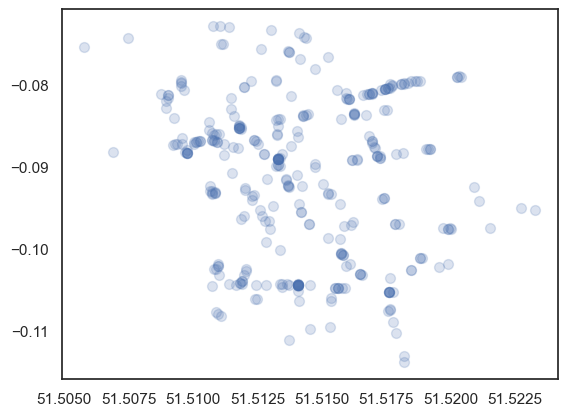

In [40]:
X = np.array(district_locs[["Latitude", "Longitude"]], dtype="float64")
plt.scatter(X[:,0], X[:,1], alpha=0.2, s=50)

In [41]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster

# Initialize a map centered around the first data point
map_center = [district_locs["Latitude"].iloc[0], district_locs["Longitude"].iloc[0]]
m = folium.Map(location=map_center, zoom_start=12)

# Create a MarkerCluster layer for the clustered points
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each data point with cluster labels
for _, row in district_locs.iterrows():
    folium.Marker([row["Latitude"], row["Longitude"]], icon=None).add_to(marker_cluster)

url = str(code.values[0])+ "_map2.html"
# webbrowser.open(url,new=new)
m

In [42]:
# # Save the map to an HTML file
m.save("Accident_Loc_map2.html")

### Cluster with DBSCAN

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
import random

In [44]:
X_train = district_locs

#### NN ile Epsilon ve min_samples değeri bulma

In [45]:
# from sklearn.neighbors import NearestNeighbors

# nn = NearestNeighbors(n_neighbors=20).fit(X_train)
# distances, indices = nn.kneighbors(X_train)

In [46]:
# distances = np.sort(distances, axis=0)
# distances = distances[:,1]
# plt.figure(figsize=(10,8))
# plt.plot(distances)

In [47]:
# min_samples = range(10,21)
# eps = np.arange(0.00025,0.005, 0.0001)

In [48]:
# output = []

# for ms in min_samples:
#     for ep in eps:
#         labels = DBSCAN(min_samples=ms, eps = ep).fit(X_train).labels_
#         score = silhouette_score(X_train, labels)
#         output.append((ms, ep, score))

In [49]:
# min_samples, eps, score = sorted(output, key=lambda x:x[-1])[-1]
# print(f"Best silhouette_score: {score}")
# print(f"min_samples: {min_samples}")
# print(f"eps: {eps}")

In [50]:
from geopy.distance import great_circle

def greatcircle(x,y):
    lat1, long1 = x[0], x[1]
    lat2, long2 = y[0], y[1]
    dist = great_circle((lat1,long1),(lat2,long2)).meters
    return dist

In [51]:
from sklearn.cluster import DBSCAN as dbscan

max_cluster_distance = 100
min_samples_in_cluster = 3

location_data = X_train[['Latitude','Longitude']]

clusters = dbscan(eps = max_cluster_distance, min_samples = min_samples_in_cluster, metric=greatcircle).fit(location_data)

labels = clusters.labels_
unique_labels = np.unique(clusters.labels_)

X_train['Cluster'] = labels

print(unique_labels)

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27]


#### HDBSCAN

In [52]:
import hdbscan

clusterer = hdbscan.HDBSCAN()
clusterer.fit(location_data)

HDBSCAN()

In [53]:
clusterer.labels_, clusterer.labels_.max()

(array([ 0, 11,  2, -1, -1,  7, 11,  2, 16, 10, 16, 19, -1, -1,  3, 10, 13,
         7, 19,  3, 16, -1, 16, 13, 15, -1, 16,  6,  7,  7,  4, -1, -1, -1,
        16, -1, -1,  5, -1, -1,  9, -1,  4, -1, -1,  7, -1, -1,  7,  2, -1,
        11,  0, 13,  0, -1, -1, 16,  9, -1,  7,  3,  8, -1, 11, -1, 13, 18,
        10, 10, 17, 14, -1,  0, 13, 11,  7, 11,  4, -1, 10, -1, -1, 14, -1,
        -1, 14, -1, 14, 11, -1, 10, 17, -1, -1,  4, -1, -1, 15, -1, -1, 19,
        -1, -1, -1, -1, 18, 13, 13,  6, 20, 21,  9,  5, -1, -1, 16, 12, 16,
        17,  3,  8,  0, 15, 20,  8, -1,  3, -1, 10,  3, 16, -1, 12,  5, -1,
         7, -1, -1,  9, 16, 18, 13,  3,  4, -1, 14, -1, -1,  2, -1, -1, -1,
        11, 16, 10, 16,  1, 11, -1, -1, 18, 15,  4, -1, -1, 16, -1,  4, -1,
        21, -1,  0,  4, 15,  0,  5, -1,  1,  5, 17, 15, 18,  1, -1,  7, -1,
         2, -1, -1,  4, 12, 16,  7, 10,  7, 12, -1, 11,  8, 17,  6, -1,  7,
         9,  7, -1,  8, 20, 16, 18,  8, 19, 11, -1, 11, -1, 17, 14,  1,  0,
        11, 

#### DBSCAN

In [54]:
m = folium.Map(location=[district_locs["Latitude"].mean(), district_locs["Longitude"].mean()], zoom_start=12, prefer_canvas=True)

# Define colors for clusters
num_clusters = len(unique_labels)
# Generate a list of distinct colors using a colormap
palette = sns.color_palette(None, num_clusters)
# Convert the colors to hexadecimal format
cluster_colors = {i + 1: "#{:02x}{:02x}{:02x}".format(int(c[0] * 255), int(c[1] * 255), int(c[2] * 255)) for i, c in enumerate(palette)}

# Add markers to the map with cluster-based colors
for index, row in X_train.iterrows():
    cluster = row["Cluster"]
    color = cluster_colors.get(cluster, "gray")
    if(cluster != -1):
        folium.CircleMarker(location=(row["Latitude"], row["Longitude"]),
                            color=color,
                            fill=True,
                            fill_color=color, 
                            popup=f"Cluster {cluster}",
                            radius=3).add_to(m)

# url = str(code.values[0])+ "_dbscanclustermap.html"
# webbrowser.open(url,new=new)
m

In [55]:
# # save
m.save("dbscanclustermap.html")

### Cluster with K-Means

In [56]:
import pandas as pd
import folium
from sklearn.cluster import KMeans
import math 

In [57]:
# Load your data into a pandas dataframe
data1 = district_locs
# Extract the latitude and longitude columns
X = data1[["Latitude", "Longitude"]]

#### K Seçme Genel Kural - "Pattern Classification" book by Duda et al.

In [58]:
# Specify the number of clusters (k)
k = round(math.sqrt(len(X)/2))  # You can adjust this based on your requirements

In [59]:
# Create a KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to your data
kmeans.fit(X)

c:\Users\kdrer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=13, random_state=42)

In [60]:
# Add the cluster labels to your dataframe
data1["Cluster"] = kmeans.labels_

In [61]:
m = folium.Map(location=[district_locs["Latitude"].mean(), district_locs["Longitude"].mean()], zoom_start=12, prefer_canvas=True)

# Create points with different random colors for each cluster
cluster_colors = {}
for _, row in data1.iterrows():
    cluster_label = row["Cluster"]
    if cluster_label not in cluster_colors:
        cluster_colors[cluster_label] = "#{:02x}{:02x}{:02x}".format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    color = cluster_colors[cluster_label]
    folium.Circle(location=[row["Latitude"], row["Longitude"]], radius=2, color=color, fill=True, fill_color=color, fill_opacity=0.6, popup=f"Cluster {cluster_label}").add_to(m)

# url = str(code.values[0])+ "_kmeansclustermap.html"
# webbrowser.open(url,new=new)
m

In [62]:
# # Save the map to an HTML file
m.save("kmeansclustermap.html")